# Part II - Why Prosper Inc. Provides Better Personal Loan for Borrowers?
## by: Abdulrahman Jalloh

## Investigation Overview

> A personal loan is a type of lump-sum financing borrowers can get from a traditional bank, credit union or online lender, which they can use for a variety of expenses. Many personal loans can be used to fund common family expenses like home improvement projects, wedding expenses, vacations and, in some cases, even the purchase of land. My **overall goal** of this presentation is to: <br>- **Show why Prosper Inc. provides better loans.** <br>The key insights that will us achieve our goal are: **<br>- Carlifornia state is where most loans originates from with 14% <br>- Interest rates have been falling from 2011 at just above 22% to just below 16% in 2014 <br>- Expensive (higher amount) loans does not mean higher interest rates, it is the same for annual costs of loans (Borrower APR). <br>- Debt consolidattion is the single most important stated reason for loans with just over 50%. <br>- The more monthly income that people have, the higher the amount of loan they will receive or access...thus monthly income positively correlates with loan amount.**

## Dataset Overview

> This dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates and stuffs like that provided by Prosper Inc, a San-Francisco based company. I have made some data wrangling with the original datasets; sampling the data, replacing values, dropping columns, creating new columns/feature engineering etc

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.offline as py 
py.init_notebook_mode(connected=True)

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
# filtered loans with variables of interests
loan_df_filtered = pd.read_csv('data/filtered_loans.csv')
# subset (sampling) data
loan_df_subset = pd.read_csv('data/filtered_loans_subset.csv')
loan_df_subset.shape

(200, 16)

In [4]:
def transform_to_percentage(df, old_col, new_col):
    """function to take decimal rate and tranform to 100% rate"""
    df[new_col] = df[old_col]*100
    return df[new_col].unique()[:5] # first 5 unique values

## Where are Loan requests coming from the most?

> Before exploring variables that will help us achieve our goal, let us first understand where loans are coming from the most. Carlifornia processes the most loans as you can see from the dark blue area on the map with 14% of the total loans, this is followed by Texas, Florida, and New York all on 6%, as shown in the map below. This will help stakeholders understand where there loan products are being used the most.

In [5]:
# compute to get all us abbreviated states to list
us_states = loan_df_filtered.BorrowerState.value_counts().index.tolist()
# compute to get number of loans associated to each state
loan_requests = loan_df_filtered.BorrowerState.value_counts().values.tolist()
# transform to dataframe
map_df = pd.DataFrame({'State': us_states, 'LoanRequests': loan_requests})
# compute proportion of number of loans per state
map_df['Proportion'] = map_df.LoanRequests / map_df.LoanRequests.sum() * 100

In [6]:
# define figure for map with plotly express
fig = px.choropleth(map_df, locations='State', color='Proportion',
                    locationmode="USA-states", 
                    scope="usa",
                    color_continuous_scale="blues",
                    range_color=(0, 15),
                    labels={'Proportion':'% of Loans'}
                  )

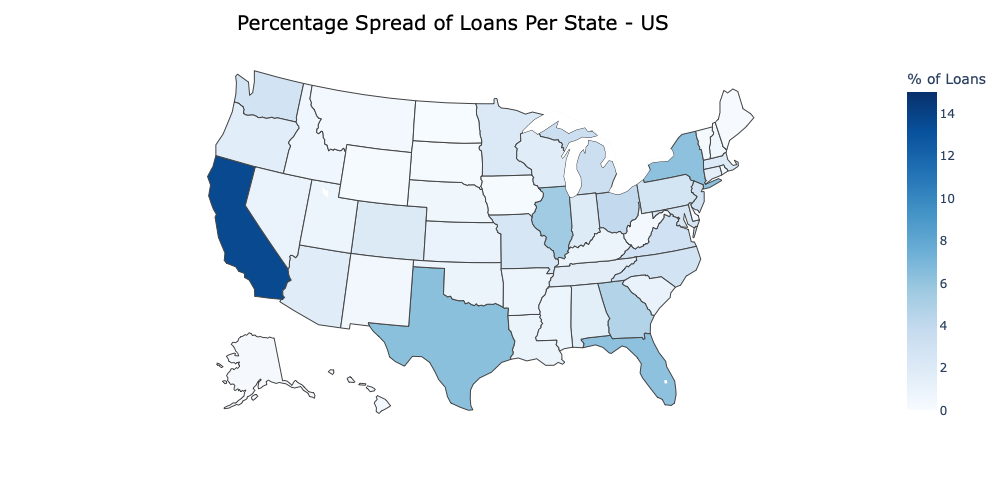

In [7]:
# update map layout properties
fig.update_layout(
    height=500,
    width=800,
    title_text = 'Percentage Spread of Loans Per State - US',
    title_font_size = 20,
    title_font_color="black", 
    title_x=0.45, 
    )

## What is the overall trend of interest rate over the years? 

> Interest rates have been falling from when peaked at just above 22% in 2011, to just under 16% in 2014, as shown in the chart below. As a borrower, this is good news as you'll access loans at very minimal interest rate which could help you avoid being deliquent or default or late payment.

In [8]:
# transform interest rate to percentage of 100
transform_to_percentage(loan_df_filtered, 'BorrowerRate', 'BorrowerRate_100')

array([15.8 ,  9.2 , 27.5 ,  9.74, 20.85])

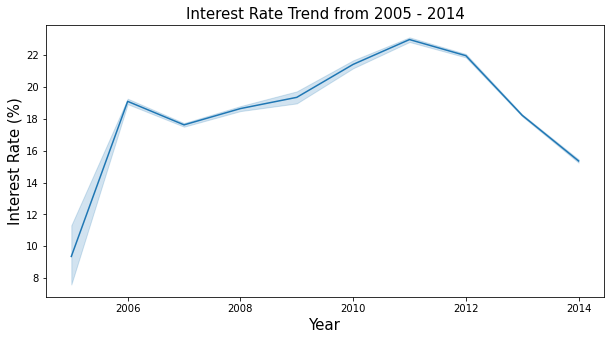

In [9]:
# define figsize for plot
plt.figure(figsize=(10,5))
sb.lineplot(x='LoanCreationYear', y='BorrowerRate_100', data=loan_df_filtered)
plt.title('Interest Rate Trend from 2005 - 2014', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Interest Rate (%)', fontsize=15)
plt.show();

## Does annual loan costs incured by borrowers increases as loan amount go up?
> Going for expensive loans doesn't necessarily mean incuring higher costs to ascertain the loan as you can see from the regression line going to negative in the chart below. The costs are clustered between 10 to 30 percent per year. This means as a borrower, the higher the amount of loan you go for, the lower the overall annual borrower cost (interest rate plus initial loan fee) you'll pay for the loan.

In [10]:
# transform interest rate to percentage of 100
transform_to_percentage(loan_df_subset, 'BorrowerAPR', 'BorrowerAPR_100')

array([20.735, 29.537, 14.714, 20.053, 25.259])

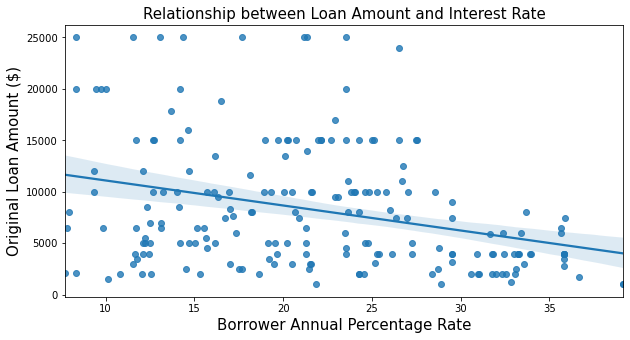

In [11]:
# here we use the subset sampling data to avoid overplotting
# define figsize for plot
plt.figure(figsize=(10,5))
sb.regplot(x='BorrowerAPR_100', y='LoanOriginalAmount', data=loan_df_subset)
plt.title('Relationship between Loan Amount and Interest Rate', fontsize=15)
plt.xlabel('Borrower Annual Percentage Rate', fontsize=15)
plt.ylabel('Original Loan Amount ($)', fontsize=15)
plt.show();

## What do most people report using the loan for??

Most people, over 50%, reported to use the loan for debt consolidation. What this means is that Prosper's personal loans are designed flexible for borrowers to use and cover all of their other outstanding loans, one of the reasons why their loans are better for borrowers. It's also good to see a good percentage of people opting for loans to venture into Business. 

In [16]:
# compute proportion of top reasons to use loan
top_reasons_prop = loan_df_filtered['ListingCategory (numeric)'].value_counts() / loan_df_filtered['ListingCategory (numeric)'].value_counts().sum() * 100
# define order of listing or chart
listing_order = top_reasons_prop.index
listing_values = top_reasons_prop.values
# set color
color = sb.color_palette()[0]
# dataframe
df = pd.DataFrame({'reasons': listing_order, 'prop': listing_values})
df.head(2)

,reasons,prop
0,Debt Consolidation,51.175650
1,Not Available,14.889808


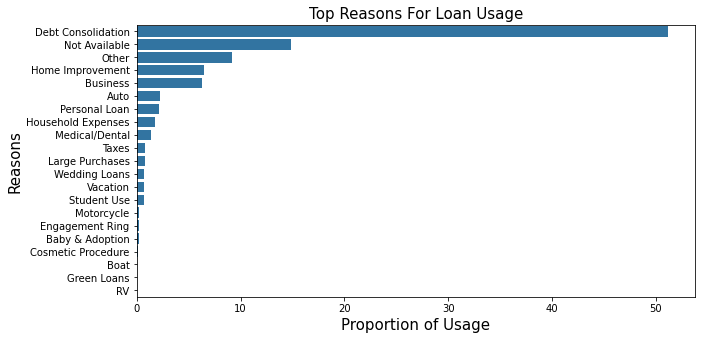

In [19]:
# call function to describe plot
plt.figure(figsize=(10, 5))
sb.barplot(x='prop', y='reasons', data=df, order=listing_order, color=color,)
plt.title('Top Reasons For Loan Usage', fontsize=15)
plt.xlabel('Proportion of Usage', fontsize=15) # for some reason, xlabel and ylabel are not working for sb.countplot
plt.ylabel('Reasons', fontsize=15)# in the custom plot_description function I created at the top
plt.show();

## Does loan amount increases as monthly income rises?

It is clear that as people's monthly income increases, so too the amount of loan they can access. For borrowers, this will provide you with the opportunity to access higher amount of loan as your income increases.

In [12]:
# create xtick and scale for x-axis in subset sample data
xtick_scale = np.arange(0, loan_df_subset.StatedMonthlyIncome.max()+5000, 5000)
xtick_scale_label = ['0', '<5k', '<10k', '<15k', '<20k', '<25k', '<30k', '<35k', '<40k', '<45k']

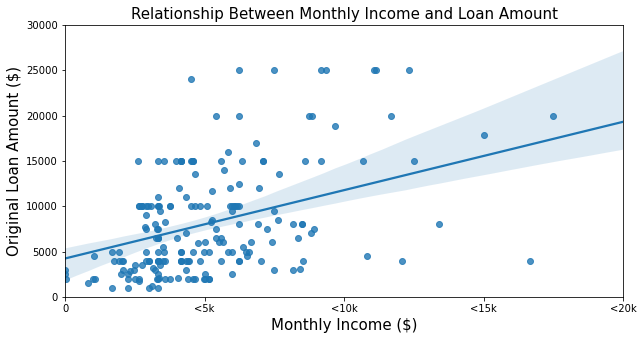

In [13]:
# Using the sample data of 200 rows to avoid overplotting
plt.figure(figsize=(10,5))
sb.regplot(x='StatedMonthlyIncome', y='LoanOriginalAmount', data=loan_df_subset)
plt.title('Relationship Between Monthly Income and Loan Amount', fontsize=15)
plt.xlabel('Monthly Income ($)', fontsize=15)
plt.ylabel('Original Loan Amount ($)', fontsize=15)
plt.xticks(xtick_scale, xtick_scale_label);
plt.xlim(0, 20000) # outlier from 20000 onwards, thus zoom in
plt.ylim(0, 30000)
plt.show();

## Conclusion

> Overall, it is shown that interest rate or annual borrower cost of loan (Borrower APR) are very favourable and they decrease as you access higher amount of loan. A key insight to point at also is that interest rate for Prosper Inc. loans has been falling from 22% in 2011 to 16% in 2014 which is great news for borrowers as they can get better deals. These insights provide a picture as to why Prospor Inc. Loans are better for borrowers.

## Thank You 😊 

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --template output_toggle.tpl